<a href="https://colab.research.google.com/github/UmmuHusnul/Assignment-3-PCD/blob/main/Assignment_3_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Histogram Equalization

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Na Jaemin.jpeg to Na Jaemin.jpeg


In [3]:
# Baca citra Grayscale
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [4]:
# Hitung histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Normalisasi histogram
hist /= hist.sum()

# Hitung fungsi transfer kumulatif
cumulative_hist = np.cumsum(hist)

# Equalization: Menerapkan fungsi transfer kumulatif
equalized_image = cumulative_hist[img] * 255

# Konversi tipe data ke uint8
equalized_image = equalized_image.astype(np.uint8)

# Menyimpan gambar yang telah di-equalisasi
cv2.imwrite('equalized_image.jpg', equalized_image)

True

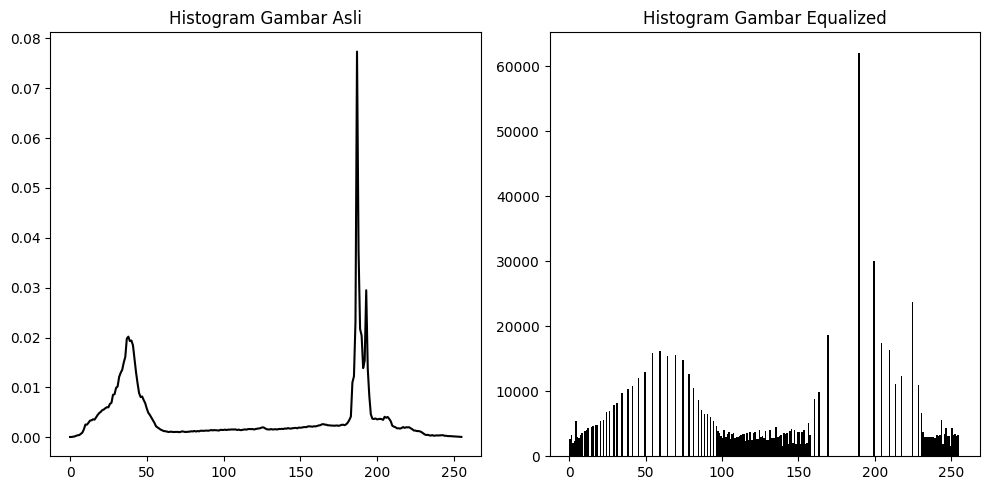

In [5]:
# Menampilkan histogram gambar asli
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(hist, color='black')
plt.title('Histogram Gambar Asli')

# Menampilkan histogram gambar yang telah di-equalisasi
plt.subplot(122)
plt.hist(equalized_image.ravel(), bins=256, range=(0, 256), color='black')
plt.title('Histogram Gambar Equalized')

plt.tight_layout()
plt.show()

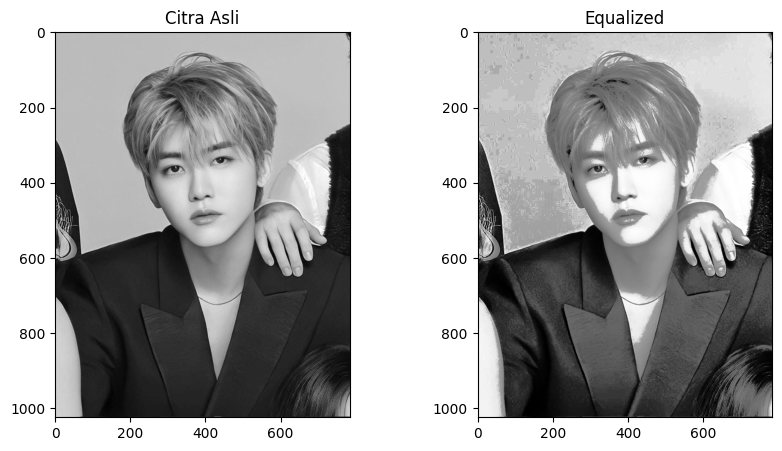

In [6]:
# Menampilkan gambar asli dan gambar yang telah di-equalisasi
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('Citra Asli')
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.title('Equalized')
plt.imshow(equalized_image, cmap='gray')
plt.show()